In [1]:
#Import libraries
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
#Import the dataset
df = pd.read_csv("transcriptions.csv") #transcriptions
df1=pd.read_csv("all_commercials_classified_filtered.csv") # Nice_categories

In [3]:
#Join the two datasets
df_total=pd.concat([df.set_index('commercial_id'),df1.set_index('commercial_id')], axis=1, join='inner') #Join on commercial_id
#Keep only the transcription with log_prob >=-0.5
df_total=df_total.loc[df_total['log_prob']>=-0.5]

#Remove all the Nan values of nice_class, they are marked by -1
df_total=df_total.loc[df_total['nice_class']>-1]

#Select only the columns of interest: transcriptions (of the descriptions) and nice_class
df_total.drop('title', axis=1, inplace=True)
df_total.drop('log_prob', axis=1, inplace=True)

In [4]:
#Remove the punctuation from the transcriptions
def remove_punctuation(text):
    if pd.isna(text):
        return text
    punctuationfree="".join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree

df_total['transcription'] = df_total['transcription'].apply(remove_punctuation)

#Apply the lower method to strings

df_total['transcription'] = df_total['transcription'].apply(lambda s: s.lower() if type(s) == str else s)

In [5]:
df_total=(df_total[['transcription', 'nice_class', 'lustrum']]).copy()
df_total.head()

,transcription,nice_class,lustrum
commercial_id,,,
7cf5ef492fe149249fb0743058b4b7a9_030,ci sono persone che non possono permettersi di...,5.0,1980_1984
3f4e4732a0604b2898e1eaf068e3222c_030,qui ci vuole un black decker puoi forare tutt...,11.0,1980_1984
db28c3e1669f447594d46ce624068c4f_015,dal carciofo così ricco di qualità naturali cy...,33.0,1980_1984
732dc471d65b4b14bd64321c1a537c88_030,non ci vorrebbe un raffreddore o uninfluenza m...,5.0,1980_1984
1e3254f293284997bab437a075ffd344_030,linea graziella simpatia su due ruote buongior...,12.0,1980_1984


## Transcriptions' length considering 'nice_class' and 'lustrum'

In [6]:
#Grouping all by nice_class and lustrum
dictionary = {}
for i, g in df_total.groupby(['nice_class', 'lustrum']):
    if i not in dictionary:
        dictionary[i] = g['transcription'].tolist()  
    else:
        dictionary[i].extend(g['transcription'].tolist())

In [7]:
length=0
for key in dictionary:
    for index in range(len(dictionary[key])):
     length+=len(dictionary[key][index].split(' ')) #from list of lists to list of strings, considering only words
    print(key, (length)/len(dictionary[key]))
    length=0

(1.0, '1980_1984') 48.0
(1.0, '1985_1989') 36.5
(2.0, '1980_1984') 62.0
(3.0, '1980_1984') 50.171171171171174
(3.0, '1985_1989') 49.91355140186916
(3.0, '1990_1994') 47.291777188328915
(3.0, '1995_1999') 49.3921568627451
(3.0, '2000_2004') 43.08387096774194
(3.0, '2005_2009') 40.138297872340424
(3.0, '2010_2014') 43.74576271186441
(3.0, '2015_2019') 43.905660377358494
(3.0, '2020_2024') 44.927536231884055
(4.0, '1980_1984') 20.0
(4.0, '1985_1989') 56.09090909090909
(4.0, '1990_1994') 52.111111111111114
(4.0, '1995_1999') 40.0
(4.0, '2000_2004') 46.857142857142854
(4.0, '2005_2009') 28.142857142857142
(5.0, '1980_1984') 52.416666666666664
(5.0, '1985_1989') 46.96268656716418
(5.0, '1990_1994') 48.36363636363637
(5.0, '1995_1999') 44.83783783783784
(5.0, '2000_2004') 44.82258064516129
(5.0, '2005_2009') 46.25
(5.0, '2010_2014') 61.54838709677419
(5.0, '2015_2019') 55.825
(5.0, '2020_2024') 44.191489361702125
(6.0, '1980_1984') 40.0
(6.0, '1985_1989') 17.0
(6.0, '2005_2009') 66.0
(6.0, '2

## Transcriptions' length considering only 'lustrum'

In [8]:
dictionary = {}

for lustrum, group_df in df_total.groupby('lustrum'):
    lustrum_transcriptions = []
    for index, row in group_df.iterrows():
        lustrum_transcriptions.append(row['transcription'])
    dictionary[lustrum] = lustrum_transcriptions

In [9]:
length=0
for key in dictionary:
    for index in range(len(dictionary[key])):
     length+=len(dictionary[key][index].split(' ')) #from list of lists to list of strings, considering only words
    print(key, (length)/len(dictionary[key]))
    length=0

1980_1984 45.52312599681021
1985_1989 42.35876475930972
1990_1994 41.13469776297001
1995_1999 43.9837518463811
2000_2004 38.98037291462218
2005_2009 39.01917613636363
2010_2014 45.1319018404908
2015_2019 45.45874587458746
2020_2024 44.63409090909091


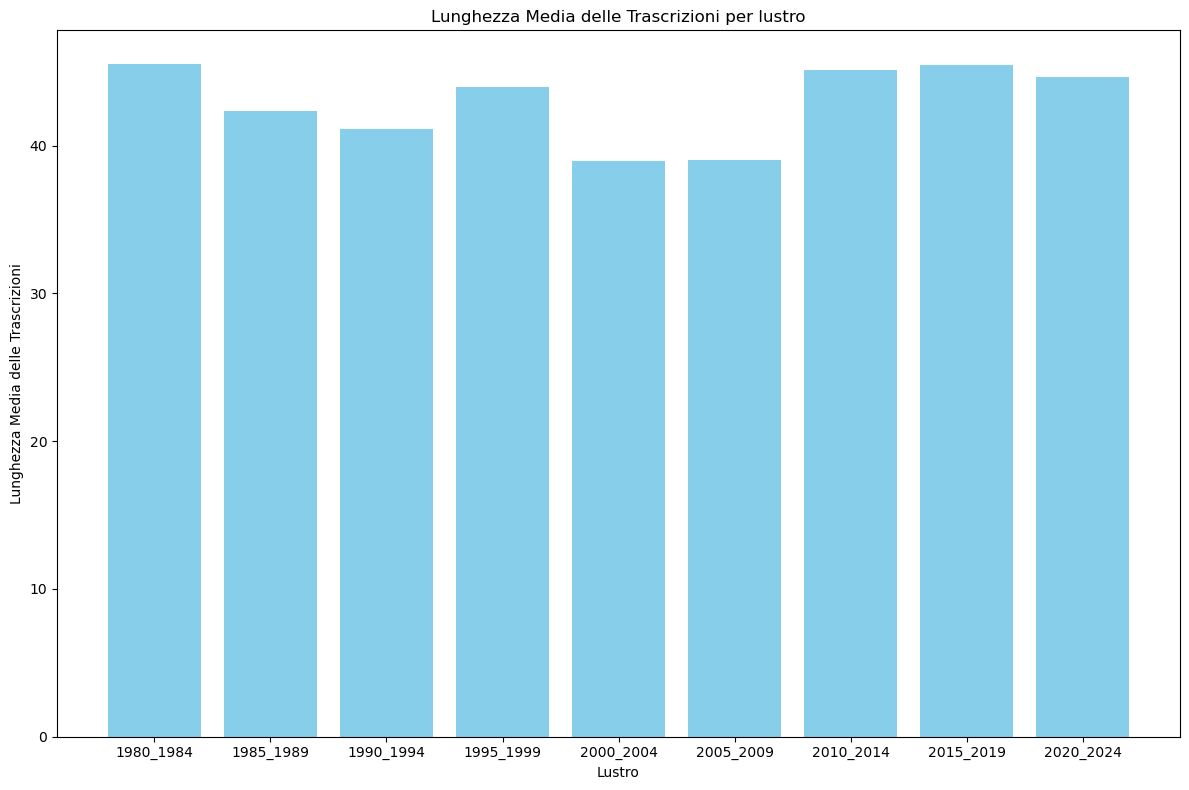

In [10]:
average_lengths = {}
for key in dictionary:
    total_length = 0
    num_strings = len(dictionary[key])
    for string in dictionary[key]:
        total_length += len(string.split(' '))
    average_lengths[key] = total_length / num_strings if num_strings > 0 else 0

# Prepara i dati per il grafico
class_labels = list(average_lengths.keys())
word_counts = list(average_lengths.values())

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Lustro')
plt.ylabel('Lunghezza Media delle Trascrizioni')
plt.title('Lunghezza Media delle Trascrizioni per lustro')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()

## Transcriptions' length considering only nice class

In [11]:
dictionary = {}

for lustrum, group_df in df_total.groupby('nice_class'):
    lustrum_transcriptions = []
    for index, row in group_df.iterrows():
        lustrum_transcriptions.append(row['transcription'])
    dictionary[lustrum] = lustrum_transcriptions

In [12]:
length=0
for key in dictionary:
    for index in range(len(dictionary[key])):
     length+=len(dictionary[key][index].split(' ')) #from list of lists to list of strings, considering only words
    print(key, (length)/len(dictionary[key]))
    length=0

1.0 40.333333333333336
2.0 62.0
3.0 46.71271076523995
4.0 45.945205479452056
5.0 48.28960817717206
6.0 33.54545454545455
7.0 38.910714285714285
8.0 44.310810810810814
9.0 35.72423398328691
10.0 31.982758620689655
11.0 38.86705202312139
12.0 37.23066298342541
13.0 11.0
14.0 20.24
15.0 37.25
16.0 41.717017208413004
17.0 18.75
18.0 36.775510204081634
19.0 28.333333333333332
20.0 34.31818181818182
21.0 43.77450980392157
22.0 34.0
23.0 28.6
24.0 36.75
25.0 29.085714285714285
26.0 17.0
27.0 26.333333333333332
28.0 47.240112994350284
29.0 40.36473755047106
30.0 42.036144578313255
31.0 39.225806451612904
32.0 34.41640378548896
33.0 26.865900383141764
34.0 25.0
35.0 45.83061889250814
36.0 52.04093567251462
37.0 54.833333333333336
38.0 49.023498694516974
39.0 41.6
40.0 78.5
41.0 35.328125
42.0 44.0
43.0 40.76851851851852
44.0 69.06666666666666
45.0 44.27777777777778


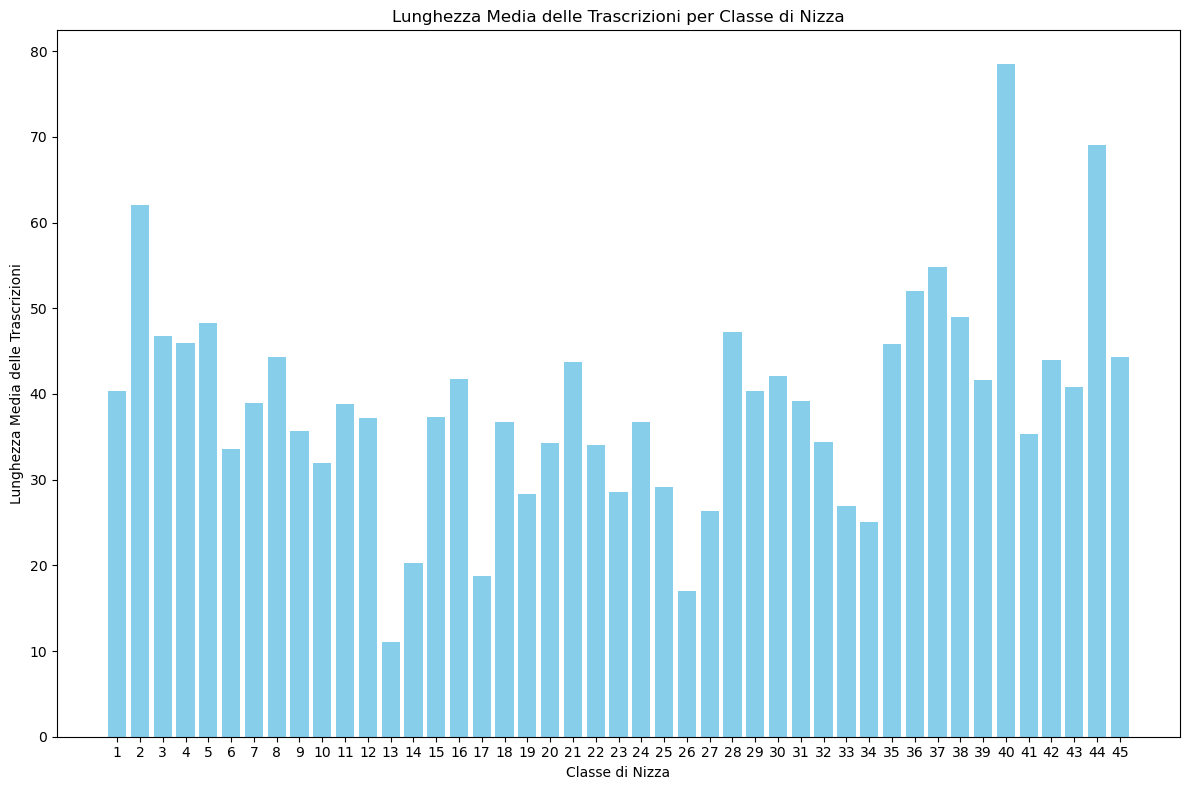

In [13]:
average_lengths = {}
for key in dictionary:
    total_length = 0
    num_strings = len(dictionary[key])
    for string in dictionary[key]:
        total_length += len(string.split(' '))
    average_lengths[key] = total_length / num_strings if num_strings > 0 else 0

# Prepara i dati per il grafico
class_labels = list(average_lengths.keys())
word_counts = list(average_lengths.values())

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Classe di Nizza')
plt.ylabel('Lunghezza Media delle Trascrizioni')
plt.title('Lunghezza Media delle Trascrizioni per Classe di Nizza')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()